# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## **Importing the necessary libraries**

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import tensorflow as tf

# Keras Sequential Model
from tensorflow.keras.models import Sequential

# Importing all the different layers and optimizers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation, LeakyReLU, Conv2D,MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam,SGD

# The below code can be used to ignore the warnings that may occur due to deprecations
import warnings
warnings.filterwarnings("ignore")

**Let us check the version of tensorflow.**

In [ ]:
tf.__version__

'2.12.0'

## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
import h5py

In [ ]:
# Open the .h5 file as read only
data_SVHN =h5py.File('/content/drive/MyDrive/Data Science/Colab Notebooks/Elective Project/SVHN_single_grey1.h5','r')

In [ ]:
# Access data and load the training and the test dataset
X_train = data_SVHN['X_train'][:]

y_train = data_SVHN['y_train'][:]

X_test = data_SVHN['X_test'][:]

y_test = data_SVHN['y_test'][:]

In [ ]:
# Close this file
data_SVHN.close()

Check the number of images in the training and the testing dataset.

In [ ]:
print('Number of images in training set', len(X_train))

Number of images in training set 42000


In [ ]:
print('Number of images in test set',len(X_test))

Number of images in test set 18000


**Observation:**
There are 42,000 images in the training data and 18,000 images in the testing data.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

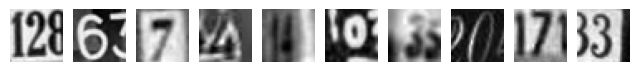

First 10 labels of the above images: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# Visualizing the first 10 images in the training dataset & printing first 10 labels in the Y_train
plt.figure(figsize = (8, 4))
for i in range(10):

     plt.subplot(1, 10, i+1)
     plt.axis('off')
     plt.imshow(X_train[i], cmap = plt.cm.binary)
plt.show()
print('First 10 labels of the above images: %s' % (y_train[0:10]))

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
#Shape of the first image in the training dataset
X_train[0].shape

(32, 32)

 32, 32 denote the number of pixels along the height and width of the 2-dimensional image.





In [ ]:
#Array of pixels for the first image in the training dataset
X_train[0]

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

In [ ]:
# Reshape dataset to have a single channel(Since the images are in grayscale, reshape the arrays to just have a single channel.)
X_train = X_train.reshape((X_train.shape[0], 1024))
X_test = X_test.reshape((X_test.shape[0], 1024))

### **Normalize the train and the test data**

In [ ]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

Print the shapes of Training and Test data

In [ ]:
#Shape of new training set
print('Shape of X_train', X_train_normalized.shape, 'Shape of y_train', y_train.shape)

Shape of X_train (42000, 1024) Shape of y_train (42000,)


In [ ]:
#Shape of new test set
print('Shape of X_test', X_test_normalized.shape,'Shape of y_test',y_test.shape)

Shape of X_test (18000, 1024) Shape of y_test (18000,)


### **One-hot encode output**

In [ ]:
# Creating one-hot encoded representation of target labels
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

In [ ]:
X_train_normalized[0]

array([0.12968785, 0.11866706, 0.10530196, ..., 0.19477727, 0.19942354,
       0.20799099], dtype=float32)

In [ ]:
len(X_train_normalized[0])

1024

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
y_train_encoded[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

**Observation:**
*   Each 2D image is reshaped to 1D array just to have a single channel of size 1024.
*   Since the image pixel values range from 0-255, we have divided all the pixel values by 255 to standardize the images to have values between 0-1.
*   This is a 10-class classification problem, the output layer should have 10 neurons, Therefore, one-hot encoded representation is used for the target classes.



## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [ ]:
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
# Writing a function that returns a sequential model
def nn_model_1():
    # Intializing a sequential model
    ann_model = Sequential()

    #First hidden layer with 64 nodes and the relu activation and the input shape = (1024, )
    ann_model.add(Dense(64, activation='relu', input_shape=(1024,)))

    #Second hidden layer with 32 nodes and the relu activation
    ann_model.add(Dense(32, activation='relu'))

    #Output layer with activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10
    ann_model.add(Dense(10, activation='softmax'))

    #Compile the model with the loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'.
    optimizer = tf.keras.optimizers.Adam(0.001)
    ann_model.compile(loss='categorical_crossentropy',
              optimizer = optimizer,
              metrics=['accuracy'])

    #return the compiled model
    return ann_model


In [ ]:
# Build the model(Call the nn_model_1 function and store the model in a new variable.)
model_1 = nn_model_1()

In [ ]:
#Print the summary of the model.
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:

#Fit on the train data with a validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20.
#Store the model building history to use later for visualization.
history_model_1 = model_1.fit(
                                X_train_normalized,y_train_encoded,
                                validation_split=0.2,
                                batch_size = 128,
                                verbose = 1,
                                epochs = 20)


Epoch 1/20
263/263 [==============================] - 2s 6ms/step - loss: 2.2934 - accuracy: 0.1233 - val_loss: 2.2324 - val_accuracy: 0.1744
Epoch 2/20
263/263 [==============================] - 1s 5ms/step - loss: 2.0774 - accuracy: 0.2509 - val_loss: 1.9318 - val_accuracy: 0.3089
Epoch 3/20
263/263 [==============================] - 2s 6ms/step - loss: 1.8679 - accuracy: 0.3405 - val_loss: 1.7779 - val_accuracy: 0.3869
Epoch 4/20
263/263 [==============================] - 2s 7ms/step - loss: 1.6573 - accuracy: 0.4391 - val_loss: 1.5288 - val_accuracy: 0.4907
Epoch 5/20
263/263 [==============================] - 2s 8ms/step - loss: 1.4635 - accuracy: 0.5180 - val_loss: 1.4202 - val_accuracy: 0.5255
Epoch 6/20
263/263 [==============================] - 2s 7ms/step - loss: 1.3588 - accuracy: 0.5568 - val_loss: 1.3240 - val_accuracy: 0.5768
Epoch 7/20
263/263 [==============================] - 2s 7ms/step - loss: 1.2895 - accuracy: 0.5839 - val_loss: 1.2558 - val_accuracy: 0.6013
Epoch 

### **Plot the Training and Validation Accuracies and write down your Observations.**

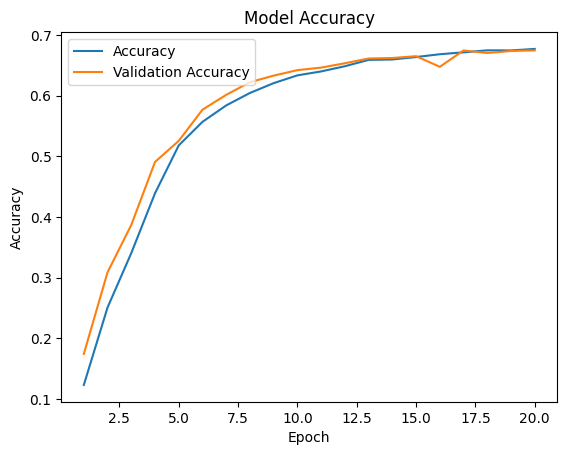

In [ ]:
list_ep = [i for i in range(1, 21)]
plt.plot(list_ep,history_model_1.history['accuracy'])
plt.plot(list_ep,history_model_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

**Observations:_______**


*  Both training accuracy and validation accuracy increasing with the increase in the epochs
*   The model is not giving good accuracy. After 20 epochs model giving ~68% training accuracy and ~67% validation accuracy.
*  Accuracy of the model on the training data is similar to the validation accuracy
*   This is a desirable scenario. It suggests that the model is learning from the training data and generalizing well to unseen data. The model's performance is improving as training progresses.





Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing backend (previous model's history )
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed again after clearing the backend
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [ ]:
def nn_model_2():
   # Intializing a sequential model
    ann_model = Sequential()

    #First hidden layer with 256 nodes and the relu activation and the input shape = (1024, )
    ann_model.add(Dense(256, activation='relu', input_shape=(1024,)))

    #Second hidden layer with 128 nodes and the relu activation
    ann_model.add(Dense(128, activation='relu'))

    #Add the Dropout layer with the rate equal to 0.2
    ann_model.add(Dropout(0.2))

    #Third hidden layer with 64 nodes and the relu activation
    ann_model.add(Dense(64, activation='relu'))

    #Fourth hidden layer with 64 nodes and the relu activation
    ann_model.add(Dense(64, activation='relu'))

    #Fifth hidden layer with 32 nodes and the relu activation
    ann_model.add(Dense(32, activation='relu'))

    #Add the BatchNormalization layer
    ann_model.add(BatchNormalization())

    #Output layer with activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10
    ann_model.add(Dense(10, activation='softmax'))

    #Compile the model with the loss equal to categorical_crossentropy,
    #  optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'
    optimizer = tf.keras.optimizers.Adam(0.0005)
    ann_model.compile(loss='categorical_crossentropy',
              optimizer = optimizer,
              metrics=['accuracy'])

    #return the compiled model
    return ann_model


In [ ]:
#Call the nn_model_2 function and store the model in a new variable.
model_2= nn_model_2()

In [ ]:
#Print the summary of the model.
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)               1

In [ ]:
#Fit on the train data with a validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30.
#Store the model building history to use later for visualization.
history_model_2 = model_2.fit(
                                X_train_normalized,y_train_encoded,
                                validation_split=0.2,
                                batch_size = 128,
                                verbose = 1,
                                epochs = 30)

Epoch 1/30
263/263 [==============================] - 7s 20ms/step - loss: 2.3301 - accuracy: 0.1020 - val_loss: 2.3126 - val_accuracy: 0.0969
Epoch 2/30
263/263 [==============================] - 4s 15ms/step - loss: 2.3040 - accuracy: 0.1043 - val_loss: 2.3018 - val_accuracy: 0.1049
Epoch 3/30
263/263 [==============================] - 3s 11ms/step - loss: 2.1035 - accuracy: 0.2029 - val_loss: 1.9555 - val_accuracy: 0.2789
Epoch 4/30
263/263 [==============================] - 3s 11ms/step - loss: 1.6221 - accuracy: 0.4240 - val_loss: 1.5954 - val_accuracy: 0.4607
Epoch 5/30
263/263 [==============================] - 5s 21ms/step - loss: 1.3656 - accuracy: 0.5424 - val_loss: 1.2720 - val_accuracy: 0.5899
Epoch 6/30
263/263 [==============================] - 6s 24ms/step - loss: 1.1958 - accuracy: 0.6150 - val_loss: 1.1094 - val_accuracy: 0.6462
Epoch 7/30
263/263 [==============================] - 5s 19ms/step - loss: 1.1250 - accuracy: 0.6400 - val_loss: 1.0664 - val_accuracy: 0.6543

### **Plot the Training and Validation Accuracies and write down your Observations.**

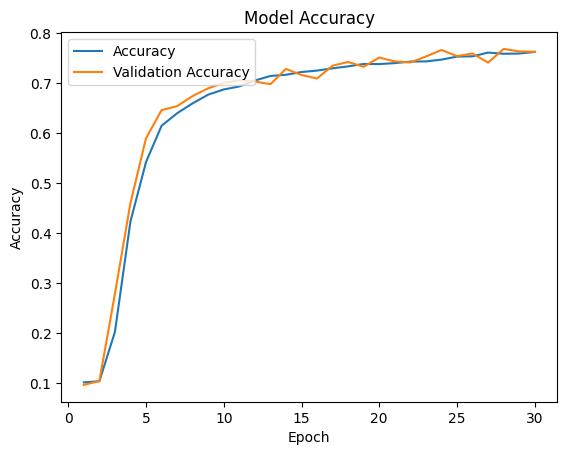

In [ ]:
list_ep = [i for i in range(1, 31)]
plt.plot(list_ep,history_model_2.history['accuracy'])
plt.plot(list_ep,history_model_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

**Observations:_______**


*   Both training accuracy and validation accuracy increasing with the increase in the epochs
*   The validation accuracy appears to be little fluctuating after 5 epochs
*   The model is performing reasonably well having a training accuracy of ~77% and a validation accuracy of ~75% after 30 epochs.

*   The model's ability to generalize to unseen data is reasonable, as indicated by the validation accuracy being close to the training accuracy. A small gap between training and validation accuracy suggests that the model is not severely overfitting the training data.
*   The model seems to have enough capacity to learn from the training data and to potentially improve the model's performance, we can consider hyperparameter tuning.








## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [ ]:
accuracy = model_2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

563/563 - 1s - loss: 0.7689 - accuracy: 0.7596 - 1s/epoch - 2ms/step


In [ ]:
# Make predictions on the test set using the second model.
y_pred = model_2.predict(X_test_normalized)

563/563 [==============================] - 2s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

              precision    recall  f1-score   support

           0       0.84      0.75      0.79      1814
           1       0.74      0.79      0.77      1828
           2       0.77      0.80      0.79      1803
           3       0.62      0.77      0.69      1719
           4       0.79      0.83      0.81      1812
           5       0.76      0.68      0.72      1768
           6       0.80      0.74      0.77      1832
           7       0.83      0.77      0.80      1808
           8       0.72      0.72      0.72      1812
           9       0.75      0.74      0.75      1804

    accuracy                           0.76     18000
   macro avg       0.76      0.76      0.76     18000
weighted avg       0.76      0.76      0.76     18000



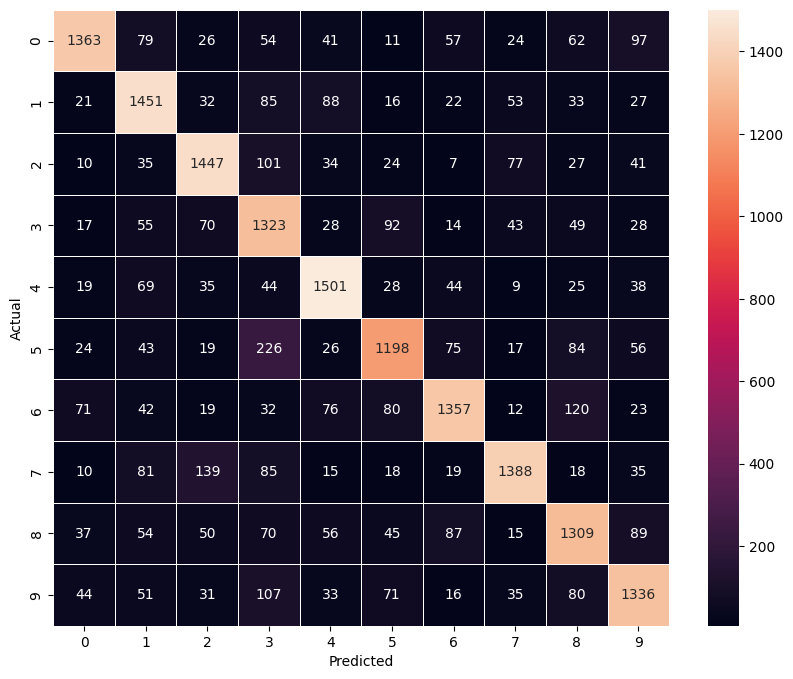

In [ ]:

# Importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Print the obtained results using the classification report and the confusion matrix.

# Printing the classification report
print(classification_report(y_test_arg, y_pred_arg))

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt=".0f",
    square=True,
    ax=ax
)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Final Observations:__________**


*   The model is giving about 74% accuracy on the test data
*   There have been many misclassifications between all classes.(This may due to the images fed into the model. The images contains not a single number but housing numbers such as 168, 14, 32 etc... But in our model we try to identify and output only a single digit.)

*   Large number of images containing number 5 have been misclassified as 3 and number 7 as 2
*   Model appears to predict numbers reasonably well but must be further improved as number of misclassification are fairly high in each class





## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [ ]:
#Loading the dataset to data_SVHN as a read only file
data_SVHN =h5py.File('/content/drive/MyDrive/Data Science/Colab Notebooks/Elective Project/SVHN_single_grey1.h5','r')

In [ ]:
# Access data and load the training and the test dataset
X_train = data_SVHN['X_train'][:]

y_train = data_SVHN['y_train'][:]

X_test = data_SVHN['X_test'][:]

y_test = data_SVHN['y_test'][:]

In [ ]:
# Close this file
data_SVHN.close()

Check the number of images in the training and the testing dataset.

In [57]:
print('Number of Images in the training dataset',X_train.shape[0],'\n','Number of Images in the test dataset', X_test.shape[0])

Number of Images in the training dataset 42000 
 Number of Images in the test dataset 18000


**Observation:**
*   There are 42000 images in the training dataset and 18000 images in the test dataset




## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [62]:
# Printing the shape and the array of pixels for the first image in the training dataset.
print('Shape of first image in the training dataset', X_train[0].shape,'\n\nArray of pixels for the first image in the training dataset\n\n', X_train[0])

Shape of first image in the training dataset (32, 32) 

Array of pixels for the first image in the training dataset

 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [63]:
#Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
X_train = X_train.reshape((X_train.shape[0], 32, 32, 1))
X_test = X_test.reshape((X_test.shape[0], 32, 32, 1))

Normalize inputs from 0-255 to 0-1

In [64]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

Print New shape of Training and Test

In [67]:
print('New shape of Training dataset: ',X_train_normalized.shape, y_train.shape)
print('New shape of Test dataset: ',X_test_normalized.shape,y_test.shape)

New shape of Training dataset:  (42000, 32, 32, 1) (42000,)
New shape of Test dataset:  (18000, 32, 32, 1) (18000,)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [68]:
# Creating one-hot encoded representation of target labels
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

In [70]:
print('Encoded target value 1 in training set: ',y_train_encoded[0])
print('Encoded target value 1 in test set: ',y_test_encoded[0])

Encoded target value 1 in training set:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Encoded target value 1 in test set:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


**Observation:**
Each entry of the target variable is a one-hot encoded vector instead of a single label.


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [71]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [72]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [78]:
def cnn_model_1(): #function that returns a sequential model

  # Intializing a sequential model
  cnn_model = Sequential()

  #First Convolutional layer with 16 filters and the kernel size of 3x3.
  #Use the 'same' padding and provide the input shape = (32, 32, 1)
  cnn_model.add(Conv2D(16, (3, 3), padding="same", input_shape=(32, 32, 1)))

  # Add a LeakyRelu layer with the slope equal to 0.1
  cnn_model.add(LeakyReLU(0.1))

  # Second Convolutional layer with 32 filters and the kernel size of 3x3 with 'same' padding
  cnn_model.add(Conv2D(32, (3, 3), padding="same"))

  #Another LeakyRelu with the slope equal to 0.1
  cnn_model.add(LeakyReLU(0.1))

  #A max-pooling layer with a pool size of 2x2
  cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

  #Flatten the output from the previous layer
  cnn_model.add(Flatten())

  #Add a dense layer with 32 nodes
  cnn_model.add(Dense(32))

  #Add a LeakyRelu layer with the slope equal to 0.1
  cnn_model.add(LeakyReLU(0.1))

  #Add the final output layer with nodes equal to the number of classes, i.e., 10 and 'softmax' as the activation function
  cnn_model.add(Dense(10, activation = 'softmax'))

  #Compile the model with the loss equal to categorical_crossentropy,
  # optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'.
  optimizer = tf.keras.optimizers.Adam(0.001)
  cnn_model.compile(
                    loss = 'categorical_crossentropy',
                    optimizer = optimizer,
                    metrics=['accuracy']
                                         )
  #return the compiled model
  return cnn_model

In [79]:
#Call the function cnn_model_1 and store the output in a new variable.
model_3 = cnn_model_1()

In [80]:
#Print the summary of the model.
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                        

In [82]:
#Fit the model on the training data with a validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20.
#Store the model building history to use later for visualization.
history_model_3 = model_3.fit(
                                X_train_normalized,y_train_encoded,
                                validation_split=0.2,
                                batch_size = 32,
                                verbose = 1,
                                epochs = 20)

Epoch 1/20
1050/1050 [==============================] - 105s 100ms/step - loss: 0.0676 - accuracy: 0.9774 - val_loss: 0.8454 - val_accuracy: 0.8674
Epoch 2/20
1050/1050 [==============================] - 103s 98ms/step - loss: 0.0661 - accuracy: 0.9775 - val_loss: 0.9237 - val_accuracy: 0.8570
Epoch 3/20
1050/1050 [==============================] - 99s 94ms/step - loss: 0.0580 - accuracy: 0.9804 - val_loss: 0.8999 - val_accuracy: 0.8727
Epoch 4/20
1050/1050 [==============================] - 100s 95ms/step - loss: 0.0571 - accuracy: 0.9816 - val_loss: 1.0121 - val_accuracy: 0.8657
Epoch 5/20
1050/1050 [==============================] - 100s 95ms/step - loss: 0.0550 - accuracy: 0.9815 - val_loss: 0.9819 - val_accuracy: 0.8679
Epoch 6/20
1050/1050 [==============================] - 99s 95ms/step - loss: 0.0490 - accuracy: 0.9838 - val_loss: 1.0034 - val_accuracy: 0.8708
Epoch 7/20
1050/1050 [==============================] - 99s 94ms/step - loss: 0.0456 - accuracy: 0.9846 - val_loss: 0.9

### **Plot the Training and Validation Accuracies and Write your observations.**

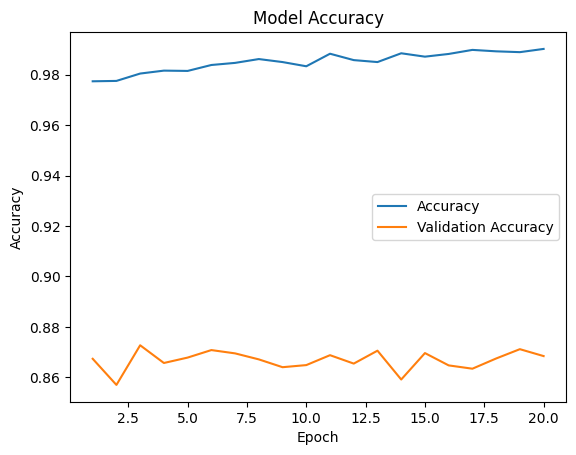

In [85]:
list_ep = [i for i in range(1, 21)]
plt.plot(list_ep,history_model_3.history['accuracy'])
plt.plot(list_ep,history_model_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Validation Accuracy'], loc='center right')
plt.show()

**Observations:__________**



*   Model performance has improved as both training and validation accuracies have increased significantly compared to previous models.
*   The training accuracy reached 99.02%, indicating that the model performs exceptionally well on the training dataset. It has learned to fit the training data with a high degree of accuracy.
*   The validation accuracy is 86.85%, which is a strong performance but slightly lower than the training accuracy. This indicate that the model is overfitting and may not generalize well to unseen data.
*   Still we can see fluctuations in validation accuracy. We may conclude that since the model is very well performing in training data and model is very complex, it may overfit the training data early in training, leading to high training accuracy but poor generalization to the validation set.
*   May be the overfitting cause fluctuations in validation accuracy as the model tries to fit noise in the training data.





Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [86]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [87]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [88]:
def cnn_model_2(): #function that returns a sequential model

  # Intializing a sequential model
  cnn_model = Sequential()

  # First Convolutional layer with 16 filters and the kernel size of 3x3.
  #Use the 'same' padding and provide the input shape = (32, 32, 1)
  cnn_model.add(Conv2D(16, (3, 3), padding="same", input_shape=(32, 32, 1)))

  #Add a LeakyRelu layer with the slope equal to 0.1
  cnn_model.add(LeakyReLU(0.1))

  # Second Convolutional layer with 32 filters and the kernel size of 3x3 with 'same' padding
  cnn_model.add(Conv2D(32, (3, 3), padding="same"))

  #Another LeakyRelu with the slope equal to 0.1
  cnn_model.add(LeakyReLU(0.1))

  #A max-pooling layer with a pool size of 2x2
  cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

  #Add a BatchNormalization layer
  cnn_model.add((BatchNormalization()))

  #Third Convolutional layer with 32 filters and the kernel size of 3x3 with 'same' padding
  cnn_model.add(Conv2D(32, (3, 3), padding="same"))

  #Another LeakyRelu with the slope equal to 0.1
  cnn_model.add(LeakyReLU(0.1))

  #Fourth Convolutional layer 64 filters and the kernel size of 3x3 with 'same' padding
  cnn_model.add(Conv2D(64, (3, 3), padding="same"))

  #Another LeakyRelu with the slope equal to 0.1
  cnn_model.add(LeakyReLU(0.1))

  #Add a max-pooling layer with a pool size of 2x2
  cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

  #Add a BatchNormalization layer
  cnn_model.add((BatchNormalization()))

  #Flatten the output from the previous layer
  cnn_model.add(Flatten())

  #Add a dense layer with 32 nodes
  cnn_model.add(Dense(32))

  #Add a LeakyRelu layer with the slope equal to 0.1
  cnn_model.add(LeakyReLU(0.1))

  #Add a dropout layer with the rate equal to 0.5
  cnn_model.add(Dropout(0.5))

  #Add the final output layer with nodes equal to the number of classes, i.e., 10 and 'softmax' as the activation function
  cnn_model.add(Dense(10, activation = 'softmax'))

  #Compile the model with the loss equal to categorical_crossentropy,
  # optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'.
  optimizer = tf.keras.optimizers.Adam(0.001)
  cnn_model.compile(
                    loss = 'categorical_crossentropy',
                    optimizer = optimizer,
                    metrics=['accuracy']
                                         )

  #return the compiled model
  return cnn_model

In [89]:
#Call the function cnn_model_1 and store the output in a new variable.
model_4 = cnn_model_2()

In [90]:
#Print the summary of the model.
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                          

In [93]:
#Fit the model on the training data with a validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30.
#Store the model building history to use later for visualization.
history_model_4 = model_4.fit(
                                X_train_normalized,y_train_encoded,
                                validation_split=0.2,
                                batch_size = 128,
                                verbose = 1,
                                epochs = 30)

Epoch 1/30
263/263 [==============================] - 160s 609ms/step - loss: 0.1475 - accuracy: 0.9514 - val_loss: 0.5217 - val_accuracy: 0.9077
Epoch 2/30
263/263 [==============================] - 161s 612ms/step - loss: 0.1412 - accuracy: 0.9530 - val_loss: 0.4358 - val_accuracy: 0.9163
Epoch 3/30
263/263 [==============================] - 154s 586ms/step - loss: 0.1393 - accuracy: 0.9524 - val_loss: 0.4594 - val_accuracy: 0.9165
Epoch 4/30
263/263 [==============================] - 153s 583ms/step - loss: 0.1388 - accuracy: 0.9541 - val_loss: 0.5382 - val_accuracy: 0.9131
Epoch 5/30
263/263 [==============================] - 152s 575ms/step - loss: 0.1350 - accuracy: 0.9548 - val_loss: 0.4448 - val_accuracy: 0.9125
Epoch 6/30
263/263 [==============================] - 152s 579ms/step - loss: 0.1319 - accuracy: 0.9559 - val_loss: 0.4999 - val_accuracy: 0.9138
Epoch 7/30
263/263 [==============================] - 154s 584ms/step - loss: 0.1230 - accuracy: 0.9588 - val_loss: 0.5227 -

### **Plot the Training and Validation accuracies and write your observations.**

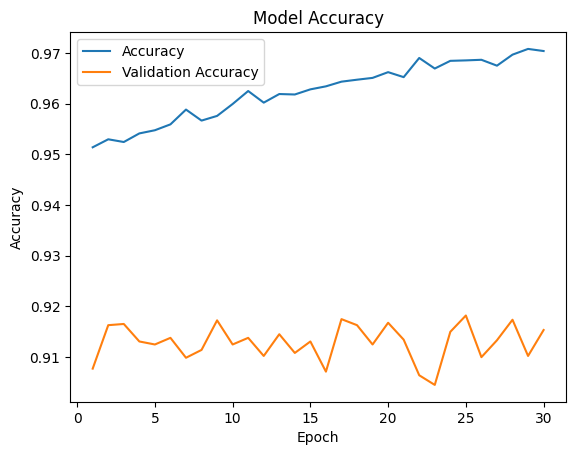

In [94]:
list_ep = [i for i in range(1, 31)]
plt.plot(list_ep,history_model_4.history['accuracy'])
plt.plot(list_ep,history_model_4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

**Observations:________**


*   Model performs reasonably well as training accuracy is ~97% and validation accuracy has improved to ~91.5%
*   The second model with dropout layers seems to have reduced the overfitting in comparison to the previous model, the validation accuracy, which is 91.54%, is a strong indicator of the model's ability to generalize to unseen data. Further the validation accuracy is close to the test accuracy and we can conclude that the model is not much overfitting the training data and can generalize reasonably well to new, unseen examples.
*   Still the validation accuracy having fluctuations in a higher range than the previous model and we may conclude that degree of overfitting present cause fluctuations in validation accuracy as the model tries to fit noise in the training data.(The Model Complexity is very high)
*   Further we can say that learning rate is a hyperparameter that controls the step size during gradient descent optimization. If the learning rate is too high, the model might overshoot the optimal solution, causing fluctuations in accuracy. If it's too low, the model's convergence can be slow, leading to fluctuations as it struggles to converge. Therefore the learning rate value may not be the ideal, hense it is better to run different values and check for the model performance.
*   Since the randomness can lead to fluctuations in training and validation accuracy we may conclude that regularization techniques like dropout introduces some randomness during training, which may lead to fluctuations in validation accuracy.
*   It is better to experiment with different learning rates and adjust the complexity of the model as well as use different batch sizes to overcome the fluctuations appear in model accuracy
*   Since the fluctuations are severe and there is no significant increase in validation accuracy we can conclude that model indicates issues that need to be addressed.











## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [95]:
# Make predictions on the test set using the second model.
y_pred = model_4.predict(X_test_normalized)

563/563 [==============================] - 26s 45ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [96]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

### **Write your final observations on the performance of the model on the test data.**

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1814
           1       0.90      0.90      0.90      1828
           2       0.91      0.93      0.92      1803
           3       0.88      0.90      0.89      1719
           4       0.91      0.93      0.92      1812
           5       0.93      0.89      0.91      1768
           6       0.89      0.91      0.90      1832
           7       0.95      0.92      0.93      1808
           8       0.90      0.91      0.90      1812
           9       0.92      0.90      0.91      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



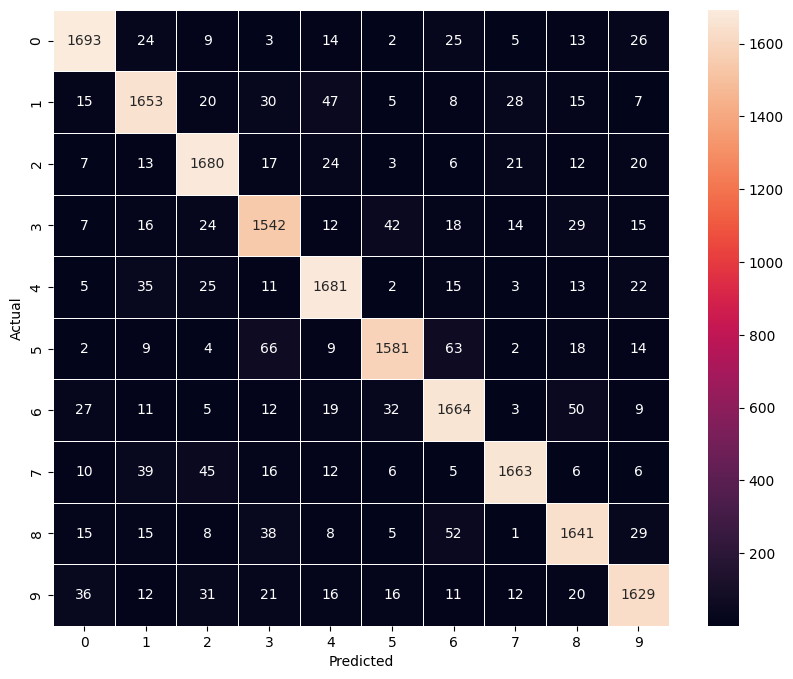

In [97]:
# Importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Print the obtained results using the classification report and the confusion matrix.

# Printing the classification report
print(classification_report(y_test_arg, y_pred_arg))

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt=".0f",
    square=True,
    ax=ax
)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Final Observations:_________**


*   The model is giving about 91% accuracy on the test data leading to a significantly reduced number of misclassifications across all classes comparaed to the previous model.
*   The model achieved a training accuracy of 97.04% after 30 epochs. This indicates that the model has learned to fit the training data quite well and can make accurate predictions on the data it was trained on
*   The fluctuations in validation accuracy may suggest that the model's training dynamics from the start to end of the epochs are unstable. This could be due to various factors, such as a high learning rate, a complex model architecture, or insufficient training data. These factors may lead to the model bouncing between different local minima in the loss landscape.
*   To address the fluctuations, it may be worth exploring hyperparameter tuning. Experiment with different learning rates, regularization techniques and model architecture to stabilize the training process and reduce fluctuations.
*   It's essential to strike a balance between achieving high training accuracy and ensuring strong generalization to unseen data therefore this scenario indicates areas for improvement in terms of model architecture, hyperparameters, and training strategies to adress the fluctuations in accuracy.

**Choosing the Final Model**


*   As the final model to predict unseen data I would select model 4, which is the last cnn model that we trained cause it gives the best test accuracy of 91%








